# Base Line Predictions - Predictions with a simple RandomForestClassifier
---

## Imports


In [61]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [62]:
train_path = '../pickles/train_modified_1.pkl'
test_path = '../pickles/test_modified_1.pkl'

with open(train_path, 'rb') as f:
    train_full = pickle.load(f)

with open(test_path, 'rb') as f:
    test_full = pickle.load(f)


In [63]:
train_full.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,group,...,6,7,8,9,10,11,12,13,14,15
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,2,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,4,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [64]:
test_full.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,group,group_num,...,6,7,8,9,10,11,12,13,14,15
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,13,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,18,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,19,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,21,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,23,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


## Train Test Split

In [65]:
y = train_full['Transported']
X = train_full.drop(columns=['Transported'], axis=1)

In [66]:
X.shape, y.shape

((8693, 34), (8693,))

In [67]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

## Model

Initial test with baseline model

In [68]:
model = RandomForestClassifier(random_state=42)

In [69]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [70]:
preds = model.predict(X_valid)

In [71]:
score = model.score(X_valid, y_valid) * 100
print(f"{score : .2f}")

 79.99


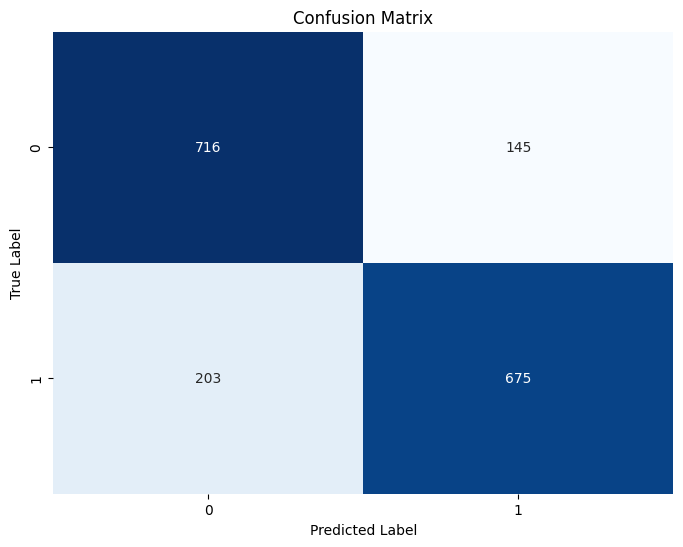

In [72]:
cm = confusion_matrix(y_valid,preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Export